In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import csv
import re
import operator

In [4]:
def makeData_fromFile(file_name,limit):
    # 파일 읽기
    with open(file_name, 'r', encoding='utf-8') as file:
        raw_data = file.read()

    pattern = re.compile(r'"(.*?)"')  # ""로 묶인 단어를 추출하는 정규표현식

    result = pattern.findall(raw_data)  # 정규표현식에 매칭되는 모든 문자열을 리스트로 반환
    pre_data = re.sub(pattern, '', raw_data) # 위에서 "xxx" "bbb" 로 된 데이터를 포함시켜 주었으므로 "xxx" "bbb" 로 된 놈들을 지워줌 raw_data 변경안되게 새 변수로

    result += pre_data.replace('"', '').split()  # ""로 묶인 단어를 제외한 나머지 단어를 리스트에 추가  
    
    

    # result = raw_data.split() #문자열을 공백을 기준으로 분리하여 리스트로 변환
    result = Counter(result) # 리스트에 있는 요소들의 빈도수를 세어 딕셔너리 형태로 반환하는 Counter 객체 

    # if limit>0:
    #     result = dict(result.most_common(limit))  # 빈도수가 높은 순으로 정렬하여 top_n개 단어만 선택

    if limit > 0: #많이나온 수서대로 보내주게
        sorted_result = dict(sorted(result.items(), key=operator.itemgetter(1), reverse=True)[:limit])
    else:
        sorted_result = dict(sorted(result.items(), key=operator.itemgetter(1), reverse=True))

    return sorted_result

def makedata_fromText(raw_data,limit):
    pattern = re.compile(r'"(.*?)"')  # ""로 묶인 단어를 추출하는 정규표현식

    result = pattern.findall(raw_data)  # 정규표현식에 매칭되는 모든 문자열을 리스트로 반환
    result += raw_data.replace('"', '').split()  # ""로 묶인 단어를 제외한 나머지 단어를 리스트에 추가  
    # result = raw_data.split() #문자열을 공백을 기준으로 분리하여 리스트로 변환
    result = Counter(result) # 리스트에 있는 요소들의 빈도수를 세어 딕셔너리 형태로 반환하는 Counter 객체 

    if limit>0:
        result = dict(result.most_common(limit))  # 빈도수가 높은 순으로 정렬하여 top_n개 단어만 선택

    return result




def createWordcloud_fromFile(filename,limit=0):
    result = makeData_fromFile(filename,limit)
    
    wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(result)
    plt.figure()
    plt.imshow(gen)



def createWordcloud_fromText(data):

    result = makedata_fromText(data)

    wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(result)
    plt.figure()
    plt.imshow(gen)


def preprocessingWithKoreanNouns(text):
    okt = Okt()
    target = okt.nouns(text)

    korean_words = [n for n in target if len(n) > 1] #한글자로 된것은 제거합니다. 

    result=' '.join(korean_words)
    return result

def preprocessingWithKoreanNouns_fromFile(filename,outputFileName="1st_preprocessing.txt"):

    okt = Okt()
    result=''

    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines() #파일의 모든 줄을 읽어옴

        for line in lines:
            print(line)
            line = line.strip()

            target = okt.nouns(line)
            korean_words = [n for n in target if len(n) > 1] #한글자로 된것은 제거합니다. 
            result +=' '.join(korean_words) + " \n"


    # 처리된 파일로 저장
    with open(outputFileName, 'w', newline='',encoding='utf-8-sig') as file:
        file.write(result)
    return result

def makeCSV(file_name,limit=0,csv_file='word_frequencies.csv'):

    result = makeData_fromFile(file_name,limit)

    # CSV 파일에 저장
    with open(csv_file, 'w', newline='',encoding='utf-8-sig') as file:
        writer = csv.writer(file)
        writer.writerow(['word', 'frequency'])  # 헤더 작성
        for word, frequency in result.items():
            writer.writerow([word, frequency])

#### 작업순서

##### 1st. PPT에 있는 raw data를 적당히 긁어와서 txt 파일을 만든다 (ex. example_1st_raw.txt)
##### 2nd. 데이터를 잘 수집하기 위해서는 엑셀에서 노가다를 해줘야하는데 이를 그나마 편하게 하기 위해서 konlpy 이용하여 한글 명사만 추출해주는 1차 전처리를 해준다. (ex. preprocessingWithKoreanNouns_fromFile('example_1st_raw.txt') -> example_2nd_preprocessing.txt)
###### 2nd-1 단순히 한글 명사만 구분해서 전처리 (영어 한글 둘다처리 힘듬)
###### 2nd-2 나중에 엑셀에서 모든 데이터를 concat 하는데 맨뒤에 공백이 없으면 문장이 붙어버려 맨뒤에 빈공백 한칸처리 (이렇게 해도 엑셀에서 추가 확인해줘서 수정해야함)
##### 3rd. 엑셀에서 전처리가 끝난 데이터를 복붙하여 파일로 만들어서 (ex. example_3rd_preprocessing.txt) csv 로 만들거나 파이썬에서 wordclud 생성한다.
##### 4th. 좀더 이쁜 그림을 위해 csv 파일로 만든뒤(ex. makeCSV("example_3rd_preprocessing")) R에서 wordcloud2 모듈을 사용하여 wordcloud 생성한다. 

### --------------------------------------------------------
### preprocessingWithKoreanNouns_fromFile() # 1차 전처리 
### --------------------------------------------------------

In [ ]:
preprocessingWithKoreanNouns_fromFile("data/y_raw.txt","csk.txt")

### --------------------------------------------------------
### createWordcloud_fromFile(filename,limit=0) // limit 에 숫자넣으면 상위 개수만 뽑아서 보여줌
### --------------------------------------------------------

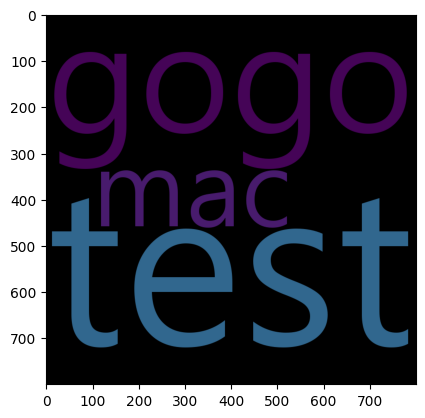

In [5]:
createWordcloud_fromFile("data.txt",20)

## makeCSV(file_name,limit=0,csv_file='word_frequencies.csv'):
###### -CSV 파일을 만듭니다. (wordcloud 생성을 wordcloud2 모듈이 사용가능한 R 에서 하기위해 만듬, R에서도 이 작업을 할 수 있겠지만 익숙하지 않아서 파이썬으로 함) 
###### -file_name 에는 단어 빈도수를 셀 수 있는, 노가다를 통해 정제된 텍스트파일을 넣어주면 빈도수를 세어서 csv파일로 만들어줌 csv_file name을 지정해줘도 되고 안해주면 word_frequencies.csv 파일이 생김
###### -만들어진 CSV 파일에는 단어와 빈도수 필드가 있고 그 필드에 해당하는 정보가 들어감(word,frequency)

In [8]:
makeCSV('data.txt')